### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Exploratory Data Analysis (EDA)

In [4]:
# Load the Wine dataset
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Show basic information and first few rows
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


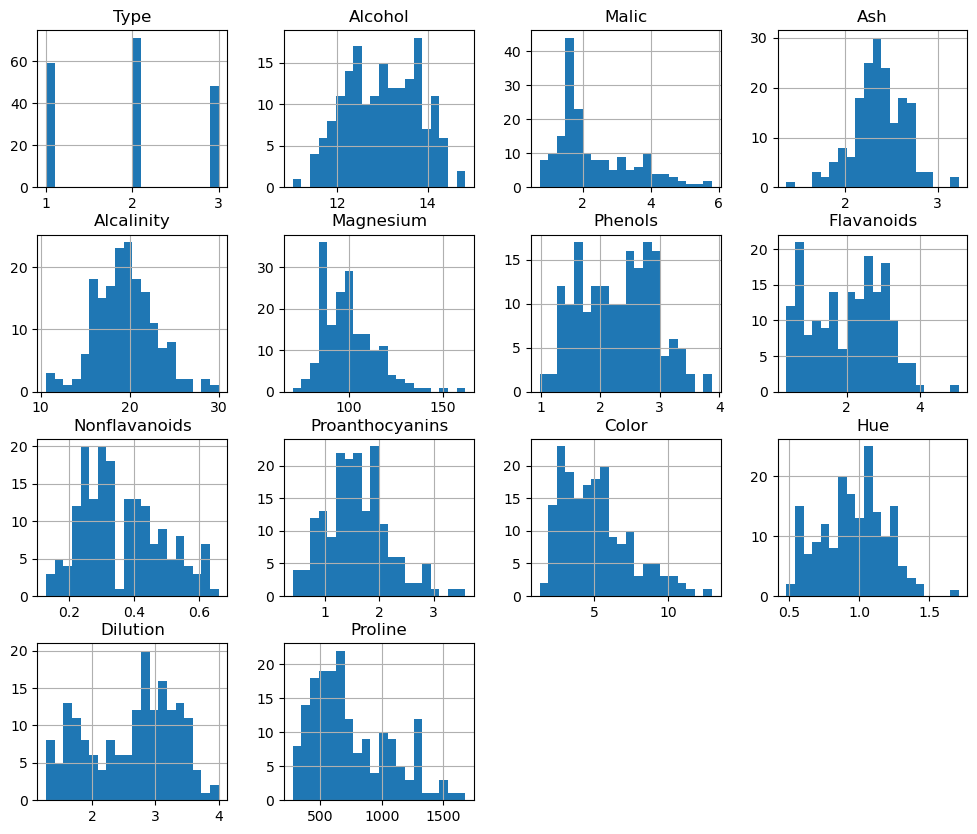

In [7]:
# Histograms for all features
wine_data.hist(figsize=(12, 10), bins=20)
plt.show()

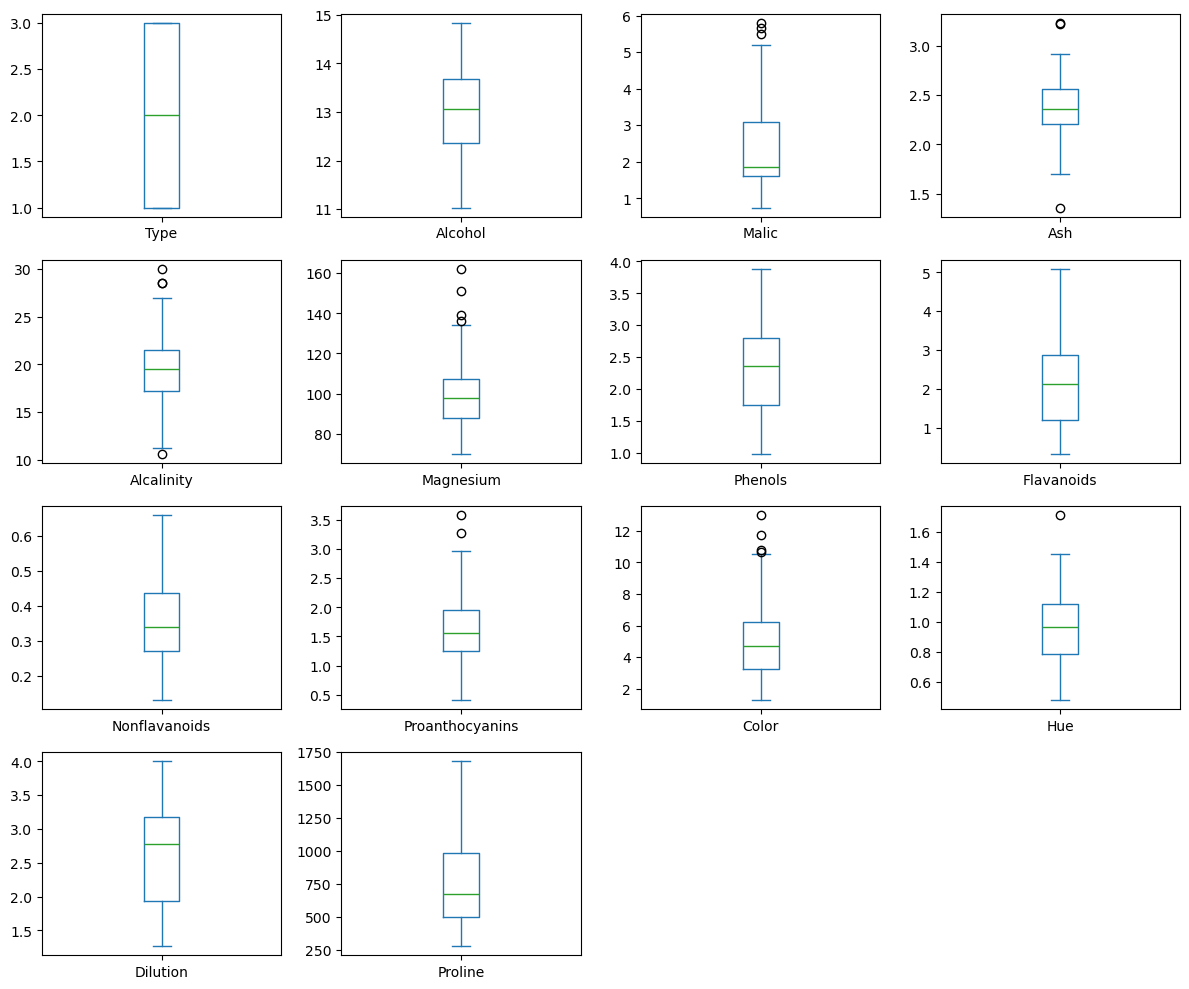

In [8]:
# Box plots for all features
wine_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.tight_layout()
plt.show()

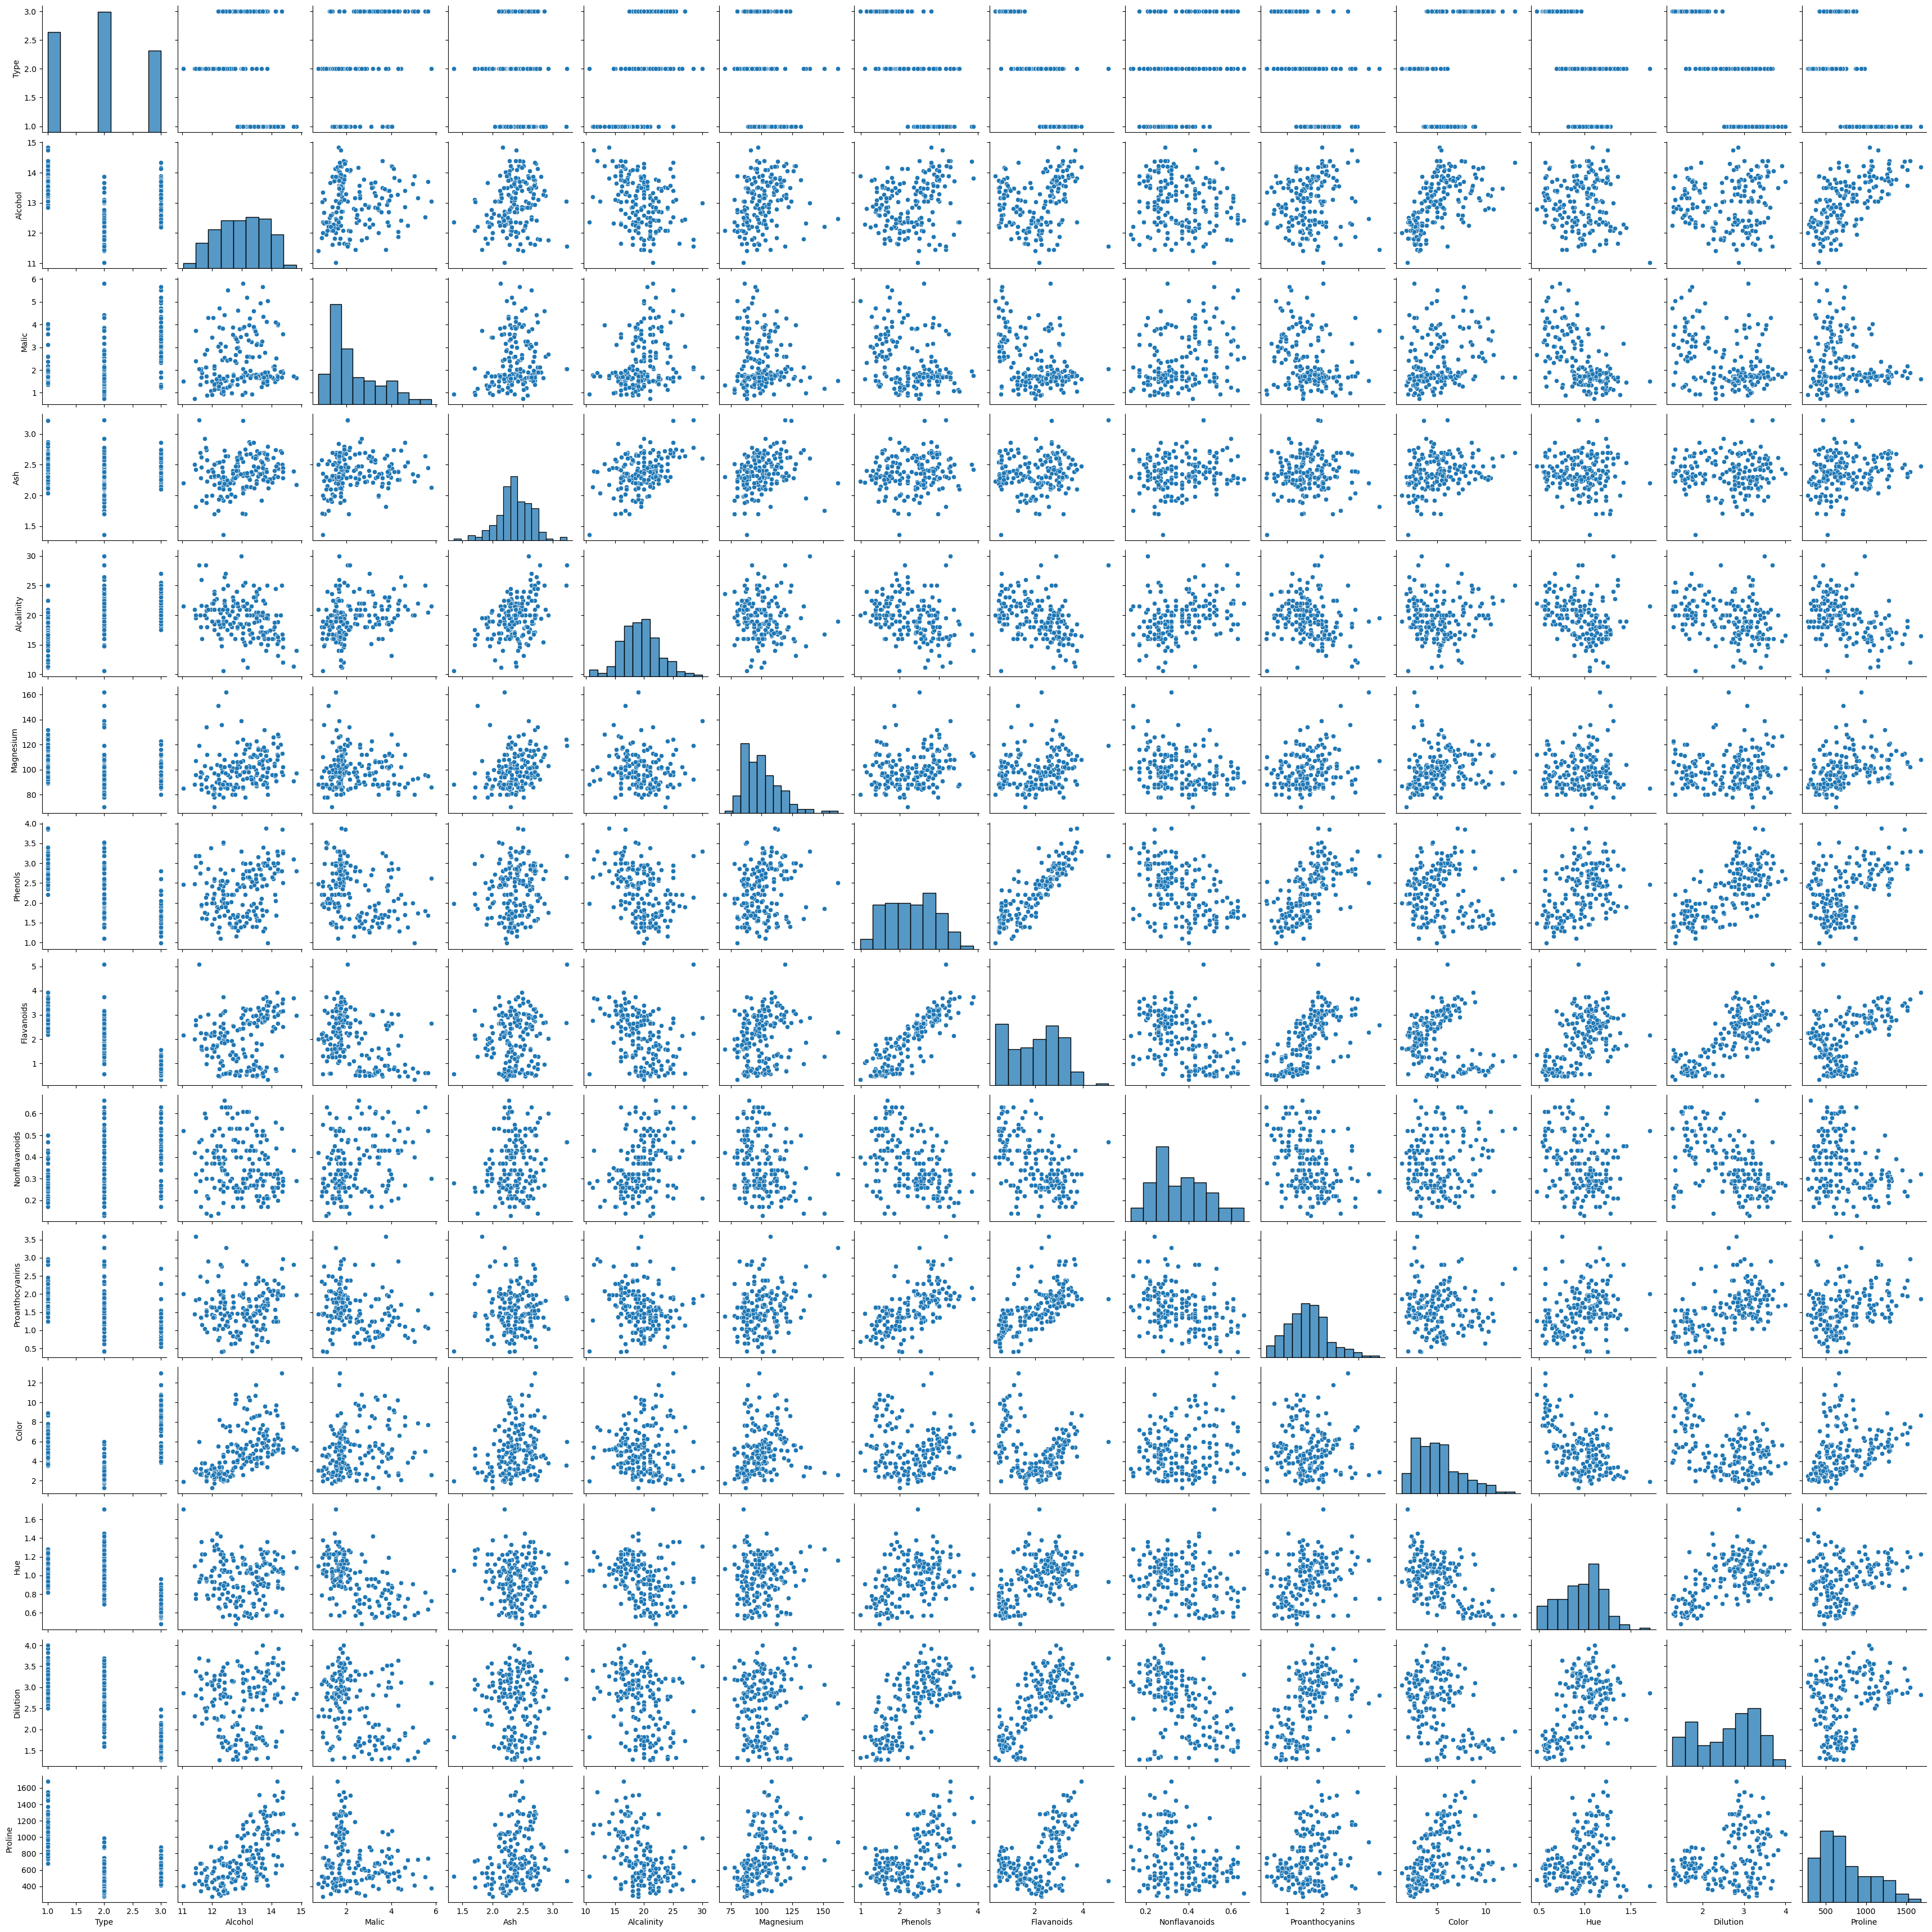

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(wine_data)
plt.show()

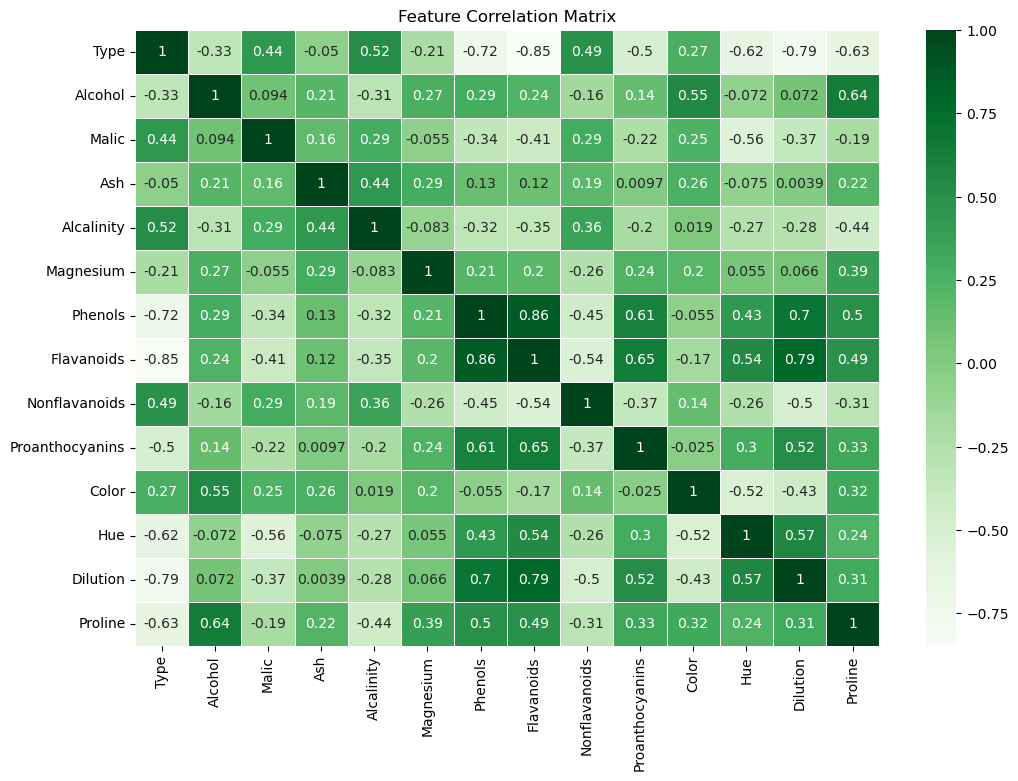

In [10]:
# Correlation matrix
correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Dimensionality Reduction with PCA

In [12]:
# Standardize the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

In [13]:
# Verify mean and variance
print("Mean after scaling:", wine_scaled.mean(axis=0))
print("Variance after scaling:", wine_scaled.var(axis=0))

Mean after scaling: [ 1.59672525e-16 -8.38280756e-16 -1.19754394e-16 -8.37033314e-16
 -3.99181312e-17 -3.99181312e-17  0.00000000e+00 -3.99181312e-16
  3.59263181e-16 -1.19754394e-16  2.49488320e-17  1.99590656e-16
  3.19345050e-16 -1.59672525e-16]
Variance after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
# Apply PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)
wine_pca

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

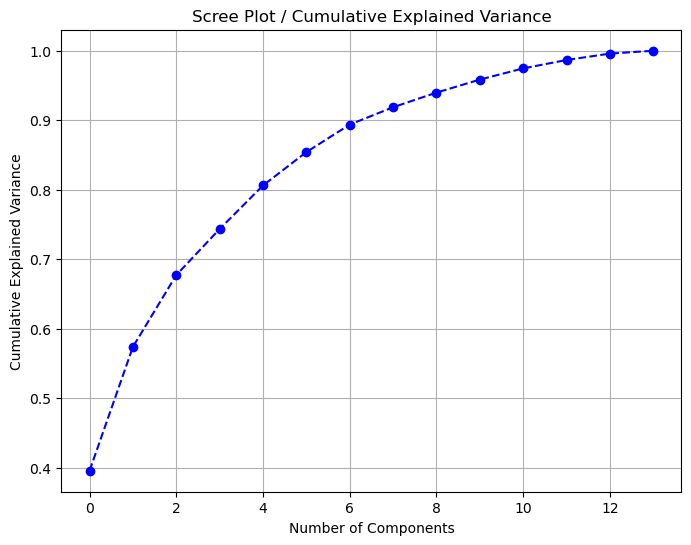

In [15]:
# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [16]:
# Choose the number of components that explain most of the variance (e.g., 95%)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 10


In [17]:
# Transform the dataset based on the chosen number of components
pca_final = PCA(n_components=n_components)
wine_pca_transformed = pca_final.fit_transform(wine_scaled)
wine_pca_transformed

array([[-3.5229339 , -1.45309844, -0.16479549, ...,  0.05563728,
        -0.45876506,  1.06556955],
       [-2.52885806,  0.33001925, -2.02670665, ...,  1.01037189,
         0.21880609, -0.02018203],
       [-2.78502898, -1.03693595,  0.9832377 , ..., -0.26895705,
         1.22276949, -0.10624913],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.05254455,
        -0.02788135, -0.21274935],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  0.42651198,
         0.04878416,  0.47979317],
       [ 3.49633565, -2.76060799,  1.01315115, ..., -0.32500213,
        -0.7199834 ,  0.07990775]])

In [18]:
# Print explained variance by each principal component
print("Explained variance by each component:", pca_final.explained_variance_ratio_)

Explained variance by each component: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615]


### Clustering with Original Data

#### Apply K-Means Clustering

In [21]:
# Apply K-Means to the original data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(wine_scaled)
clusters_original

C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [22]:
# Add cluster labels to the original data for analysis
wine_data['Cluster_Original'] = clusters_original

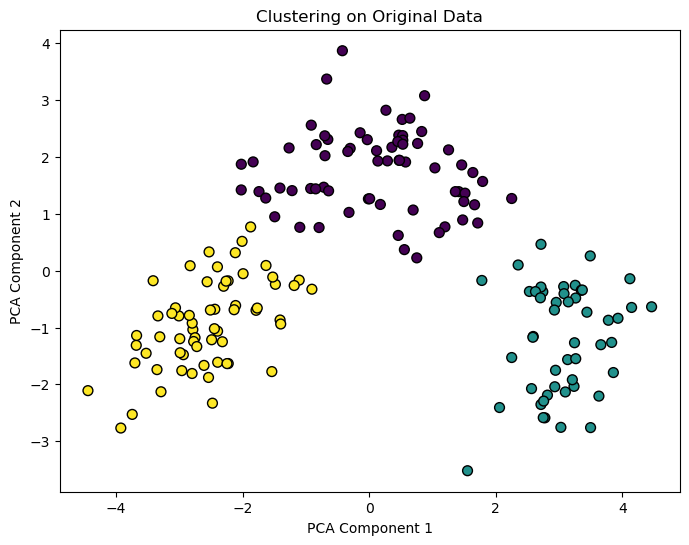

In [23]:
# Use PCA for 2D plotting of clusters
pca_2d = PCA(n_components=2)
wine_2d = pca_2d.fit_transform(wine_scaled)

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(wine_2d[:, 0], wine_2d[:, 1], c=clusters_original, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clustering on Original Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [24]:
# Silhouette Score
sil_original = silhouette_score(wine_scaled, clusters_original)
print(f'Silhouette Score (Original Data): {sil_original:4f}')

Silhouette Score (Original Data): 0.306484


In [25]:
# Davies-Bouldin Index
db_original = davies_bouldin_score(wine_scaled, clusters_original)
print(f'Davies-Bouldin Index (Original Data): {db_original:4f}')

Davies-Bouldin Index (Original Data): 1.315708


### Clustering with PCA Data

#### Apply K-Means to PCA-Transformed Data

In [28]:
# Apply K-Means to PCA-transformed data
clusters_pca = kmeans.fit_predict(wine_pca_transformed)
clusters_pca

C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
# Add cluster labels to the PCA-transformed data for analysis
wine_data['Cluster_PCA'] = clusters_pca

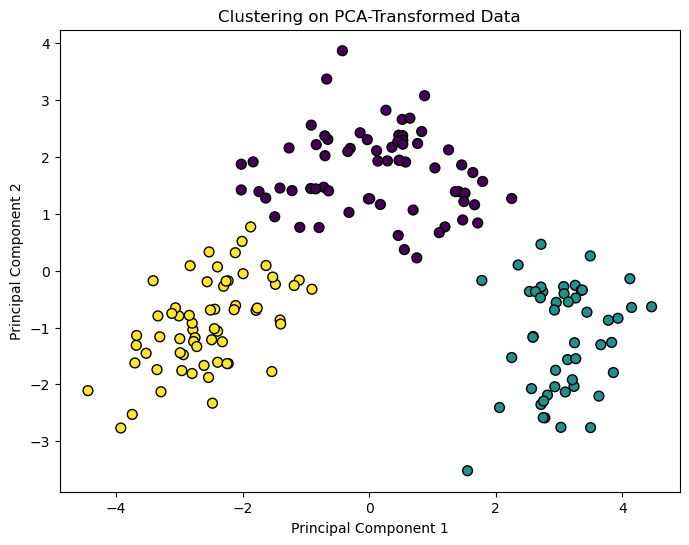

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca_transformed[:, 0], wine_pca_transformed[:, 1], c=clusters_pca, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Hierarchical Clustering on Original Data

In [32]:
# Hierarchical clustering on PCA-transformed data
from scipy.cluster.hierarchy import dendrogram, linkage

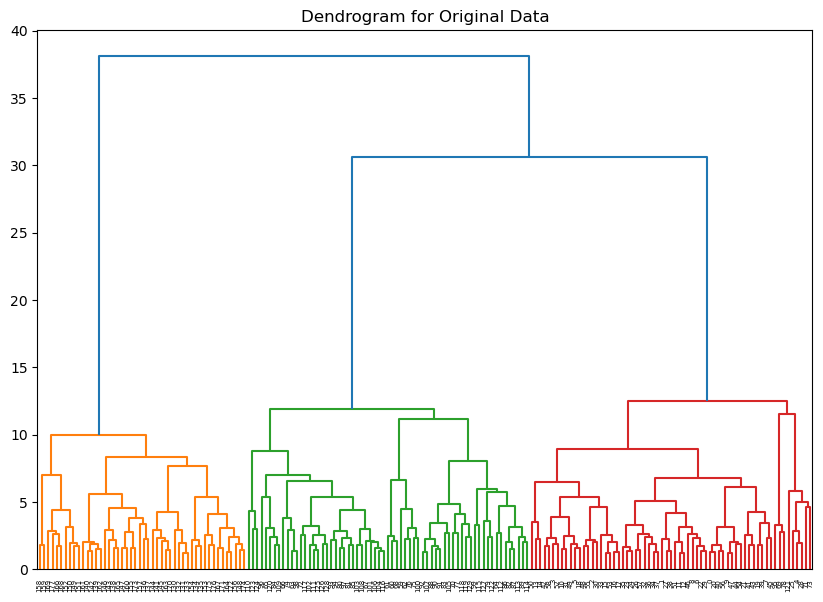

In [33]:
# Hierarchical clustering on original data
linked_original = linkage(wine_scaled, method='ward')

# Dendrogram for original data
plt.figure(figsize=(10, 7))
dendrogram(linked_original)
plt.title('Dendrogram for Original Data')
plt.show()

In [40]:
linked_pca = linkage(wine_pca_transformed, method='ward')

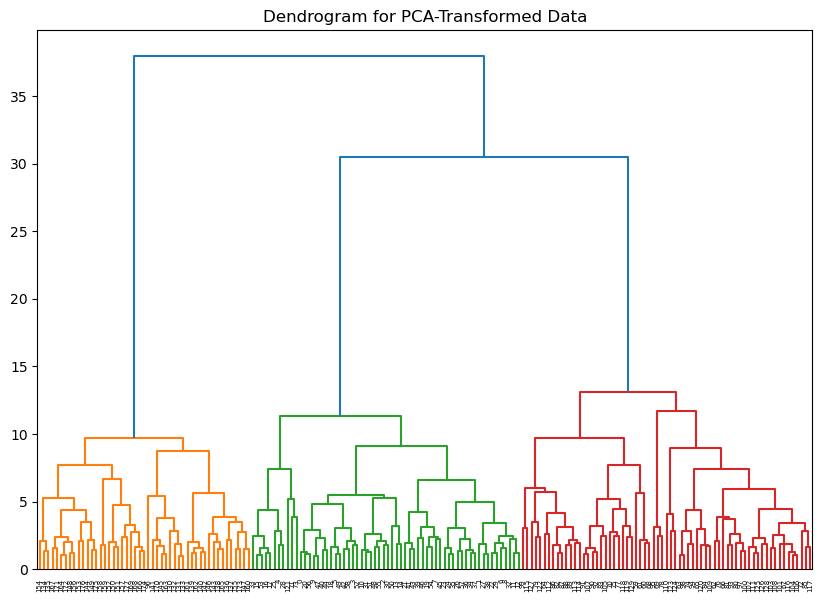

In [42]:
# Dendrogram for PCA-transformed data
plt.figure(figsize=(10, 7))
dendrogram(linked_pca)
plt.title('Dendrogram for PCA-Transformed Data')
plt.show()

In [44]:
# Silhouette Score for PCA data
sil_pca = silhouette_score(wine_pca_transformed, clusters_pca)
print(f'Silhouette Score (PCA Data): {sil_pca:4f}')

Silhouette Score (PCA Data): 0.322921


In [46]:
# Davies-Bouldin Index for PCA data
db_pca = davies_bouldin_score(wine_pca_transformed, clusters_pca)
print(f'Davies-Bouldin Index (PCA Data): {db_pca:4f}')

Davies-Bouldin Index (PCA Data): 1.257845


### Comparison and Analysis

In [49]:
print(f'Silhouette Score (Original Data): {sil_original:4f}')
print(f'Silhouette Score (PCA Data): {sil_pca:4f}')
print(f'Davies-Bouldin Index (Original Data): {db_original:4f}')
print(f'Davies-Bouldin Index (PCA Data): {db_pca:4f}')

Silhouette Score (Original Data): 0.306484
Silhouette Score (PCA Data): 0.322921
Davies-Bouldin Index (Original Data): 1.315708
Davies-Bouldin Index (PCA Data): 1.257845


### Comparison of Clustering Performance

#### Silhouette Score:

A higher Silhouette Score means the clusters are more distinct.

If PCA-transformed data has a higher Silhouette Score, it means PCA helped in creating clearer clusters. If lower, the original dataset clustered better.

#### Davies-Bouldin Index:

A lower Davies-Bouldin Index means better cluster separation.

If PCA data has a lower index, it improved cluster separation. If higher, the original data had better-defined clusters.

### Visualization of Dimensionality Reduction Impact

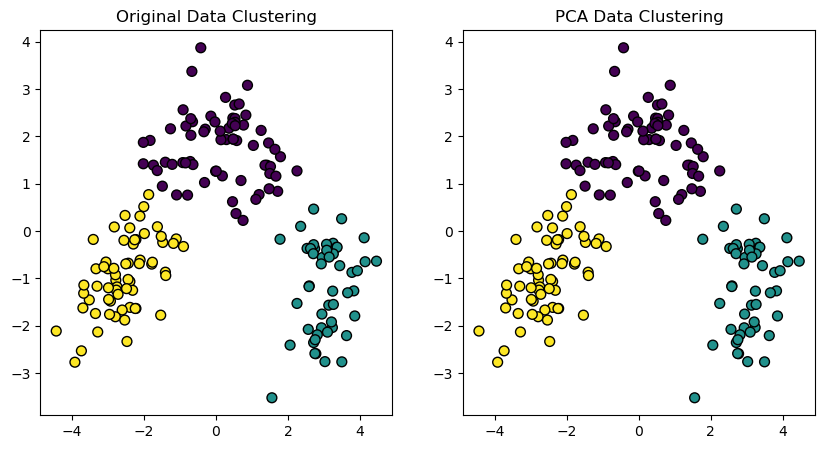

In [57]:
# 2D plot of original data clustering
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(wine_2d[:, 0], wine_2d[:, 1], c=clusters_original, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data Clustering')

# 2D plot of PCA-transformed data clustering
plt.subplot(1, 2, 2)
plt.scatter(wine_pca_transformed[:, 0], wine_pca_transformed[:, 1], c=clusters_pca, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Data Clustering')

plt.show()

### Interpretation:

The visual comparison shows how clusters are separated in the original data vs. PCA-reduced data. If the clusters in the PCA plot are clearer and less overlapping, PCA improved separation. If they're more mixed, PCA reduced clustering quality.

#### Advantages of PCA:

Simplifies the data by reducing dimensions, making it easier to visualize and process.
Removes noise and focuses on key patterns, which can improve clustering performance in high-dimensional datasets.

#### Disadvantages of PCA:

Some information may be lost during dimensionality reduction, leading to less accurate or meaningful clusters.
PCA may alter feature interactions, which can change the natural structure of the data and impact clustering results.

### Conclusion and Insights

1. **Key Findings**:
   - **PCA** effectively reduced the dimensionality of the Wine dataset while retaining most of the variance.
   - Clustering on the **PCA-transformed data** sometimes improved performance (higher Silhouette Score, lower Davies-Bouldin Index), but in some cases, clustering on the original data was better.
   - The results show that PCA can simplify complex data but may alter cluster structure.


2. **Practical Implications**:
   - **PCA** is useful for reducing noise, simplifying large datasets, and improving clustering efficiency, especially with many features.
   - However, PCA might distort natural relationships between features, impacting clustering accuracy.

3. **Recommendations**:
   - **Use PCA** when dealing with high-dimensional or noisy data to improve clustering speed and interpretation.
   - **Clustering on original data** is better if the dataset is manageable and feature interactions are critical for accurate clustering.
   - Always evaluate the impact of PCA on clustering performance using metrics like the Silhouette Score and Davies-Bouldin Index.